In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve,precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier #63 84
from imblearn.ensemble import BalancedBaggingClassifier #69 74
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold
import shap
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [3]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


In [178]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-最近一周自杀意念-维度数据.csv"
Dataset = pd.read_csv(fpath)
# corr_matrix = Dataset.corr()

# sns.heatmap(corr_matrix, annot=True)


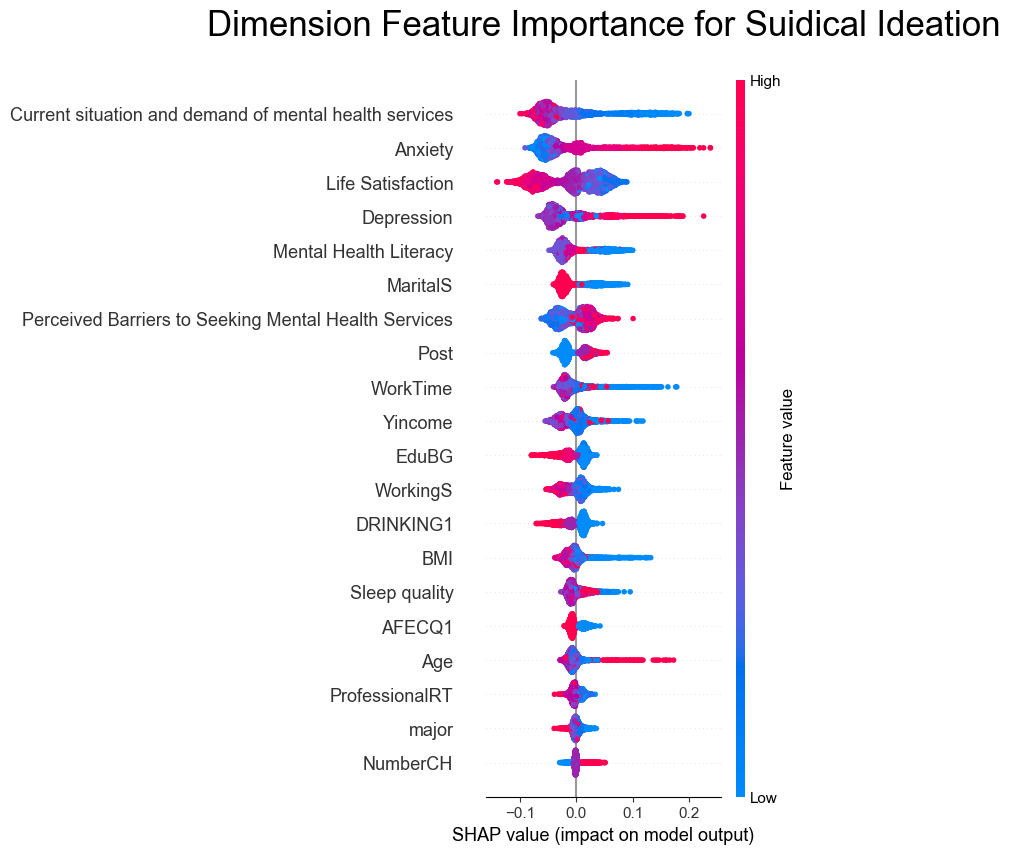

In [14]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-最近一周自杀意念-维度数据.csv"
Dataset = pd.read_csv(fpath)
y = Dataset['suicide']
x = Dataset.drop('suicide', axis=1)

feature_names = np.array(x.columns)
names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
# x_train = pd.DataFrame(x_train_resampled, columns=feature_names)
# x_test = pd.DataFrame(x_test, columns=feature_names)
weights = np.sum(y_train == 0) / np.sum(y_train == 1)

# rfc = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=2,min_samples_split=2,random_state=random_state)
# rfc = xgb.XGBClassifier(n_estimators=100,scale_pos_weight=weights,seed=1,learning_rate=0.04 )
rfc = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(x_train, y_train)
# 使用内联模式显示图像
%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)

class_names = [
     'No Suicidal Ideation',
     'Suicidal Ideation'
]
plt.subplots()

shap.summary_plot(shap_values[1], x_test, feature_names=feature_names, class_names=class_names,max_display=20,plot_size=(8, 8),show=False,plot_type="dot")
plt.title('Dimension Feature Importance for Suidical Ideation', fontsize = 25, y = 1.05)
# plt.subplots()
ax = plt.gca()

# Rotate y labels
plt.setp(ax.get_yticklabels(), rotation=360)

# shap.summary_plot(shap_values, x_test, feature_names=feature_names, class_names=class_names,max_display=20,plot_size=(8, 8),show=False)

plt.show()
plt.close()





重采样后的类别分布： Counter({1.0: 6182, 0.0: 5810})
weight:28.30597014925373
预测数据: Counter({0.0: 3269, 1.0: 97})
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      3269
         1.0       0.10      0.77      0.17        97

    accuracy                           0.79      3366
   macro avg       0.54      0.78      0.52      3366
weighted avg       0.97      0.79      0.86      3366

Recall: 0.79 Accuracy: 78.52


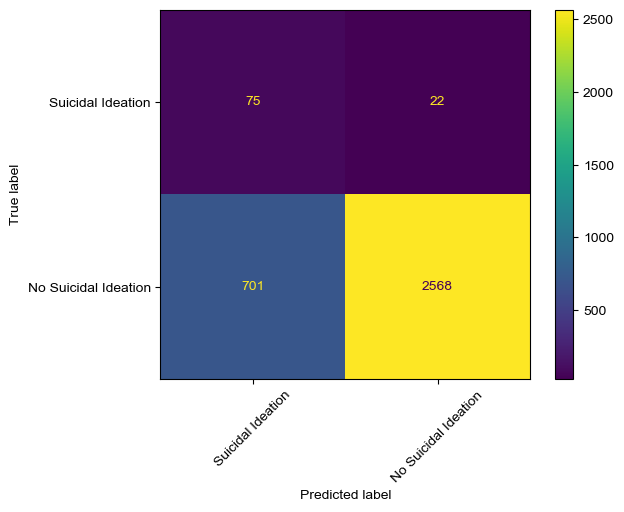

F1:  0.8562900776689517
Accuracy:  0.9863271497958734
Precision:  0.9980613893376413
Recall:  0.9754238906635482
F1 score:  0.9859915122640676


In [11]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017-全国科技工作者-最近一周自杀意念-维度数据.csv"
data = pd.read_csv(fpath)
random_state=42
y = data['suicide']
X = data.drop('suicide', axis=1)

# scaler = StandardScaler(with_mean=False, with_std=True)
# X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

# 过采样
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))
weights = np.sum(y_train == 0) / np.sum(y_train == 1)
print("weight:" + str(weights))
# brfc = RandomForestClassifier(class_weight={0:1, 1:weights},random_state=random_state, n_estimators=100)
# brfc = xgb.XGBClassifier(n_estimators=100,scale_pos_weight=weights,seed=1,learning_rate=0.04 )
brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)

print("预测数据:", Counter(y_test))
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵

label_dict = {
    1: 'Suicidal Ideation',
    0: 'No Suicidal Ideation'
}
y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()

# # 获取feature importance
# feature_names = np.array(x.columns)

# names = x.columns
# cols = list(names)
# plt.figure(figsize=(15, 5))
# plt.bar(range(len(names)), brfc.feature_importances_)
# plt.xticks(range(len(cols)), cols, rotation=-45, fontsize=14)
# plt.title('Feature importance', fontsize=14)
# plt.show()

print('F1: ', f1)
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 5-fold cross-validation on the model

cv_results = cross_validate(brfc,x_train_resampled, y_train_resampled, cv=5, scoring=scoring)

# Print the average score for each metric
print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1 score: ", cv_results['test_f1'].mean())


